# Analysis of Cleaned Beer Data

In [1]:
#Import Dependencies
import sys
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy
from pprint import pprint
import gmaps
from scipy.stats import linregress

# Which Beer Property Correlates to the Overall Rating the Most?

In [2]:
#Import review data
beer_reviews = pd.read_csv('clean_data/beer_review_data_cleaned.csv')

#Preview the data
beer_reviews

,Unnamed: 0,brewery_name,beer_style,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count,review_count_slices
0,947,Dogfish Head Brewery,American Double / Imperial IPA,10099.000000,1.212149e+09,4.145745,4.213526,4.192097,4.181763,4.325988,9.000000,2093,90 Minute IPA,3290.0,2585 and up
1,42967,North Coast Brewing Co.,Russian Imperial Stout,112.000000,1.218958e+09,4.174221,4.198650,4.373995,4.231758,4.342173,9.000000,412,Old Rasputin Russian Imperial Stout,3111.0,2585 and up
2,53469,Sierra Nevada Brewing Co.,American IPA,140.000000,1.211116e+09,4.168667,4.082333,4.225167,4.076000,4.190000,6.800000,1904,Sierra Nevada Celebration Ale,3000.0,2585 and up
3,60848,"Bell's Brewery, Inc.",American IPA,287.000000,1.221429e+09,4.329729,4.266496,4.153959,4.138746,4.318915,7.000000,1093,Two Hearted Ale,2728.0,2585 and up
4,56517,Stone Brewing Co.,American Double / Imperial IPA,147.000000,1.215671e+09,4.161612,4.341531,4.179179,4.183432,4.351331,7.700000,4083,Stone Ruination IPA,2704.0,2585 and up
5,3671,Stone Brewing Co.,American Strong Ale,147.000000,1.201520e+09,4.078402,4.119268,4.296413,4.143121,4.278846,7.200000,92,Arrogant Bastard Ale,2704.0,2585 and up
6,53485,Sierra Nevada Brewing Co.,American Pale Ale (APA),140.000000,1.199918e+09,4.245845,3.915539,3.995168,3.966950,4.115385,5.600000,276,Sierra Nevada Pale Ale,2587.0,2585 and up
7,56474,Stone Brewing Co.,American IPA,147.000000,1.209130e+09,4.257670,4.238641,4.135728,4.138252,4.297087,6.900000,88,Stone IPA (India Pale Ale),2575.0,1598-2584
8,46237,Russian River Brewing Company,American Double / Imperial IPA,863.000000,1.259614e+09,4.590028,4.612188,4.388603,4.451326,4.630985,8.000000,7971,Pliny The Elder,2527.0,1598-2584
9,22587,Founders Brewing Company,American Double / Imperial Stout,1199.000000,1.250768e+09,4.354516,4.412070,4.364508,4.387890,4.501199,8.300000,11757,Founders Breakfast Stout,2502.0,1598-2584


In [3]:
#rename data to smaller variable name
br = beer_reviews.dropna()

#Create a linear regression for palate vs. overall
palate = br[['review_palate','review_overall']] #review_overall
pl = pd.DataFrame(palate)
pl.dropna()
xpalate = pl['review_palate']
palate_min = xpalate.min()
palate_max = xpalate.max()
yy = pl['review_overall']
xpalate = xpalate.tolist()
yy = yy.tolist()
palateRegress = linregress(xpalate,yy)
pr = palateRegress
print(pr)
p1 = pr[0]*palate_min + pr[1]
print(p1)
p2 = pr[0]*palate_max + pr[1]
print(p2)

LinregressResult(slope=0.9396830063410618, intercept=0.29642928045722217, rvalue=0.9244251773969454, pvalue=0.0, stderr=0.0033236507314616556)
1.4529622113385292
4.810263721631252


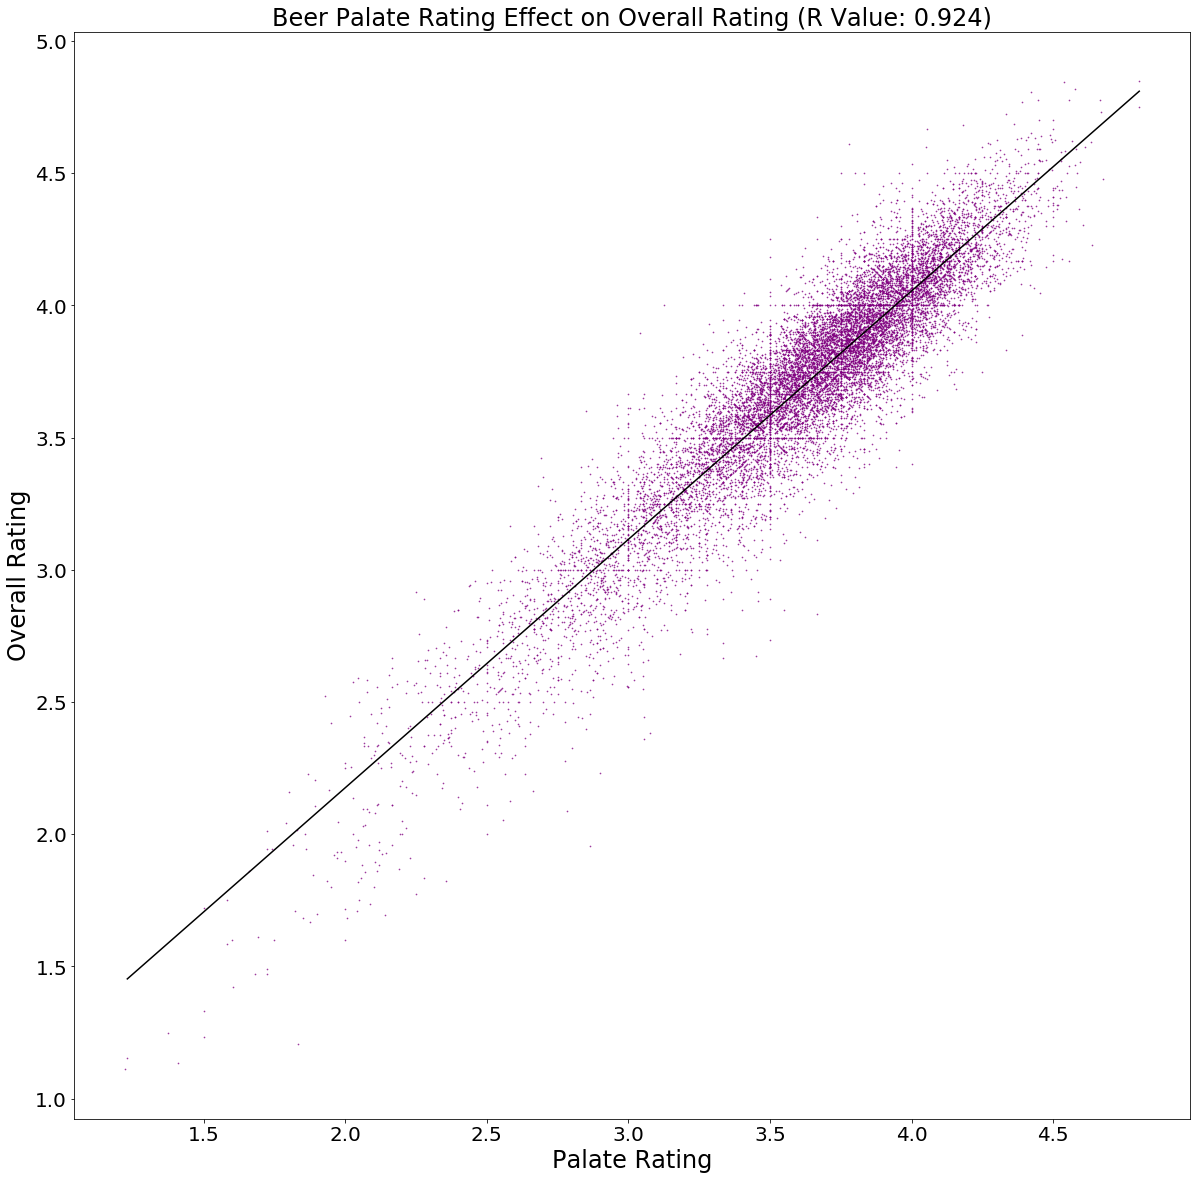

In [4]:
#Scatter plot palate review vs overall review
r = numpy.round(pr[2], 3)
plt.figure(figsize=(20,20))
plt.title(f'Beer Palate Rating Effect on Overall Rating (R Value: {r})', fontsize=24)
plt.xlabel('Palate Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(beer_reviews.review_palate, beer_reviews.review_overall, s=.5, alpha=.7, color='purple')
plt.plot([palate_min,palate_max],[p1,p2], 'k-')
plt.savefig('plots/palate_v_overall.png', bbox_inches="tight")
plt.show()

In [5]:
#Create a linear regression for aroma vs. overall
aroma = br[['review_aroma','review_overall']]
ar = pd.DataFrame(aroma)
ar.dropna()
xaroma = ar['review_aroma']
aroma_min = xaroma.min()
aroma_max = xaroma.max()
yy = ar['review_overall']
xaroma = xaroma.tolist()
yy = yy.tolist()
aromaRegress = linregress(xaroma,yy) ###
ar = aromaRegress
print(ar)
a1 = ar[0]*aroma_min + ar[1]
print(a1)
a2 = ar[0]*aroma_max + ar[1]
print(a2)

LinregressResult(slope=0.7969261386227692, intercept=0.8229564298350387, rvalue=0.8693306996103359, pvalue=0.0, stderr=0.0038844505352400235)
1.8957416164426129
4.6747660998450895


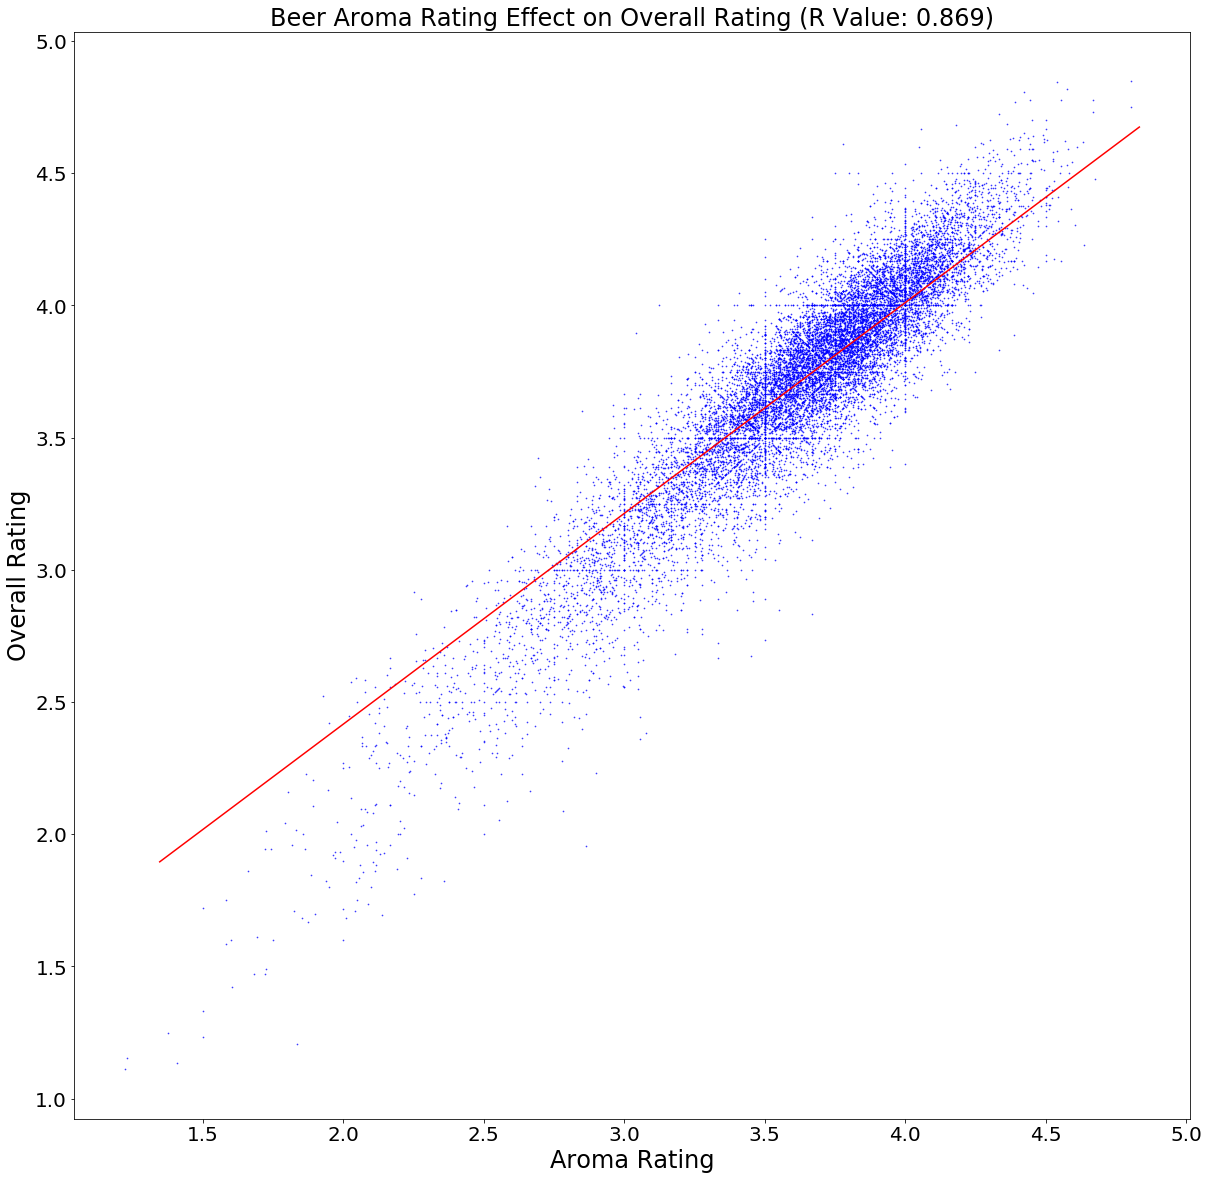

In [6]:
##Scatter plot palate review vs overall review
r = numpy.round(ar[2], 3)
plt.figure(figsize=(20,20))
plt.title(f'Beer Aroma Rating Effect on Overall Rating (R Value: {r})', fontsize=24)
plt.xlabel('Aroma Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(beer_reviews.review_palate, beer_reviews.review_overall, s=.5, alpha=.7, color='blue')
plt.plot([aroma_min,aroma_max],[a1,a2], 'r-')
plt.savefig('plots/aroma_v_.png', bbox_inches="tight")
plt.show()

In [7]:

#appearance

appearance = br[['review_appearance','review_overall']]
ap = pd.DataFrame(appearance)
ap.dropna()

xappear = ap['review_appearance']
app_min = xappear.min()
app_max = xappear.max()
print(app_min)
print(app_max)
yy = ap['review_overall']
xappear = xappear.tolist()
yy = yy.tolist()
appearRegress = linregress(xappear,yy)
ar = appearRegress
a1 = ar[0]*app_min + ar[1]

a2 = ar[0]*app_max + ar[1]
print(p2)
print(ar)

1.6363636363636365
4.722222222222221
4.810263721631252
LinregressResult(slope=0.9402325444281051, intercept=0.19196746298945166, rvalue=0.8231212515989467, pvalue=0.0, stderr=0.005561395206707562)


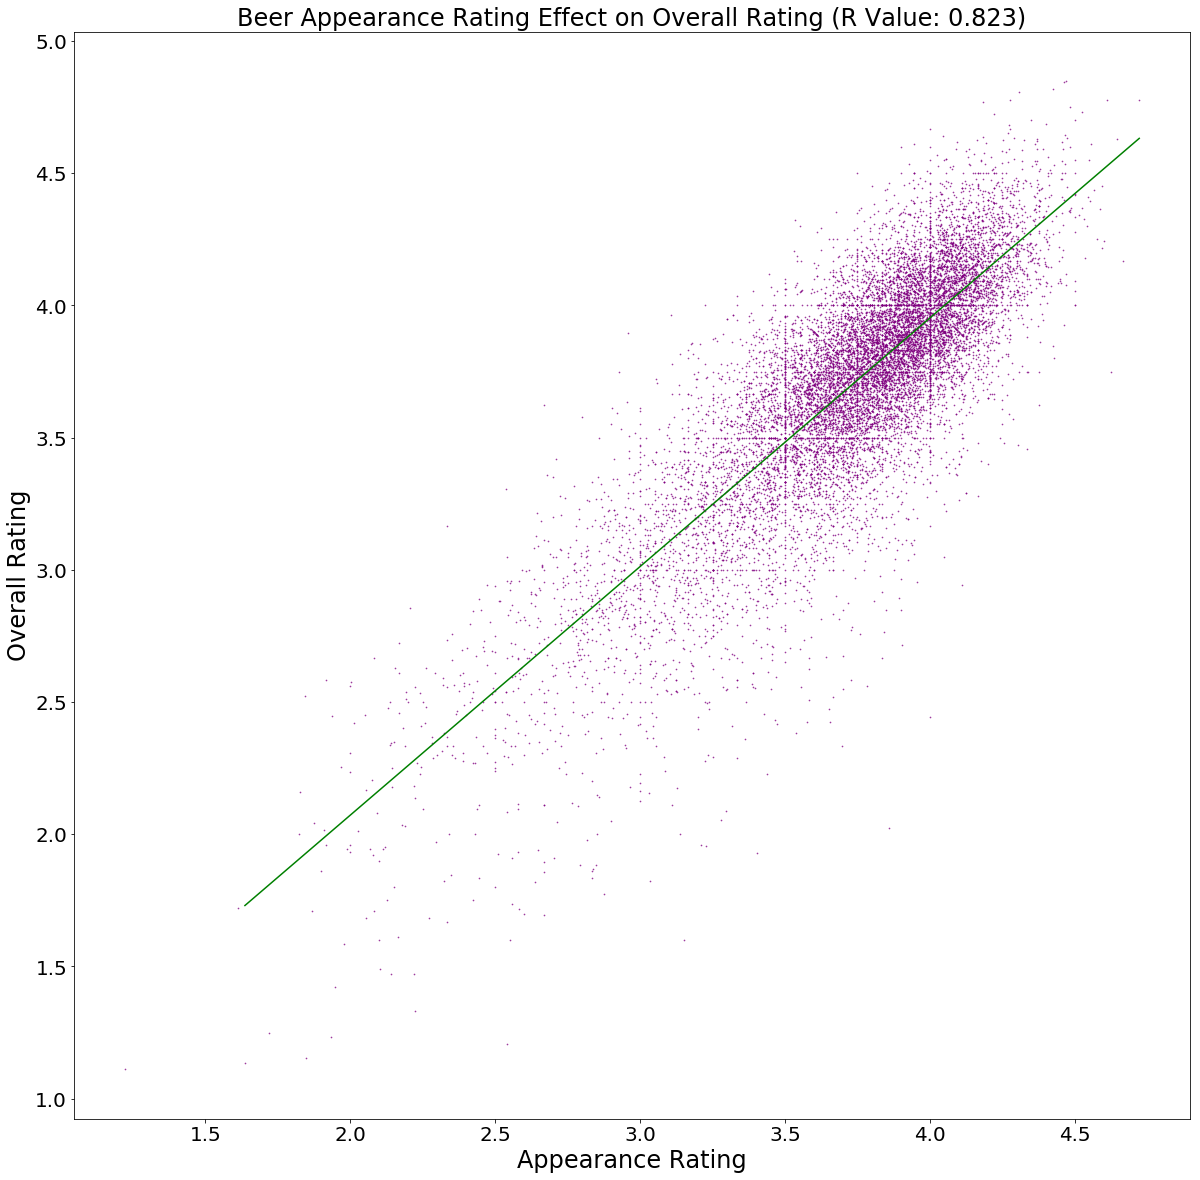

In [8]:
#Scatter plot appearance vs. overall
plt.figure(figsize=(20,20))
r = numpy.round(ar[2], 3)

plt.title(f'Beer Appearance Rating Effect on Overall Rating (R Value: {r})', fontsize=24)
plt.xlabel('Appearance Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(beer_reviews['review_appearance'], beer_reviews['review_overall'], s=.5, alpha=.7, color='purple')
plt.plot([app_min, app_max],[a1,a2], 'g-') #this way?
plt.savefig('plots/appearance_v_overall.png', bbox_inches="tight")

plt.show()

In [9]:

#taste
taste = br[['review_taste','review_overall']]
ta = pd.DataFrame(taste)
ta.dropna()
xtaste = ta['review_taste']
taste_min = xtaste.min()
taste_max = xtaste.max()
yy = ta['review_overall']
xtaste = xtaste.tolist()
yy = yy.tolist()
tasteRegress = linregress(xtaste,yy)
tr = tasteRegress
print(tr)
t1 = tr[0]*taste_min + tr[1]
print(t1)
t2 = tr[0]*taste_max + tr[1]
print(t2)

LinregressResult(slope=0.8472693265210313, intercept=0.6072227451024168, rvalue=0.9466806579754058, pvalue=0.0, stderr=0.0024721477096253776)
1.5848411987805295
4.778394814129031


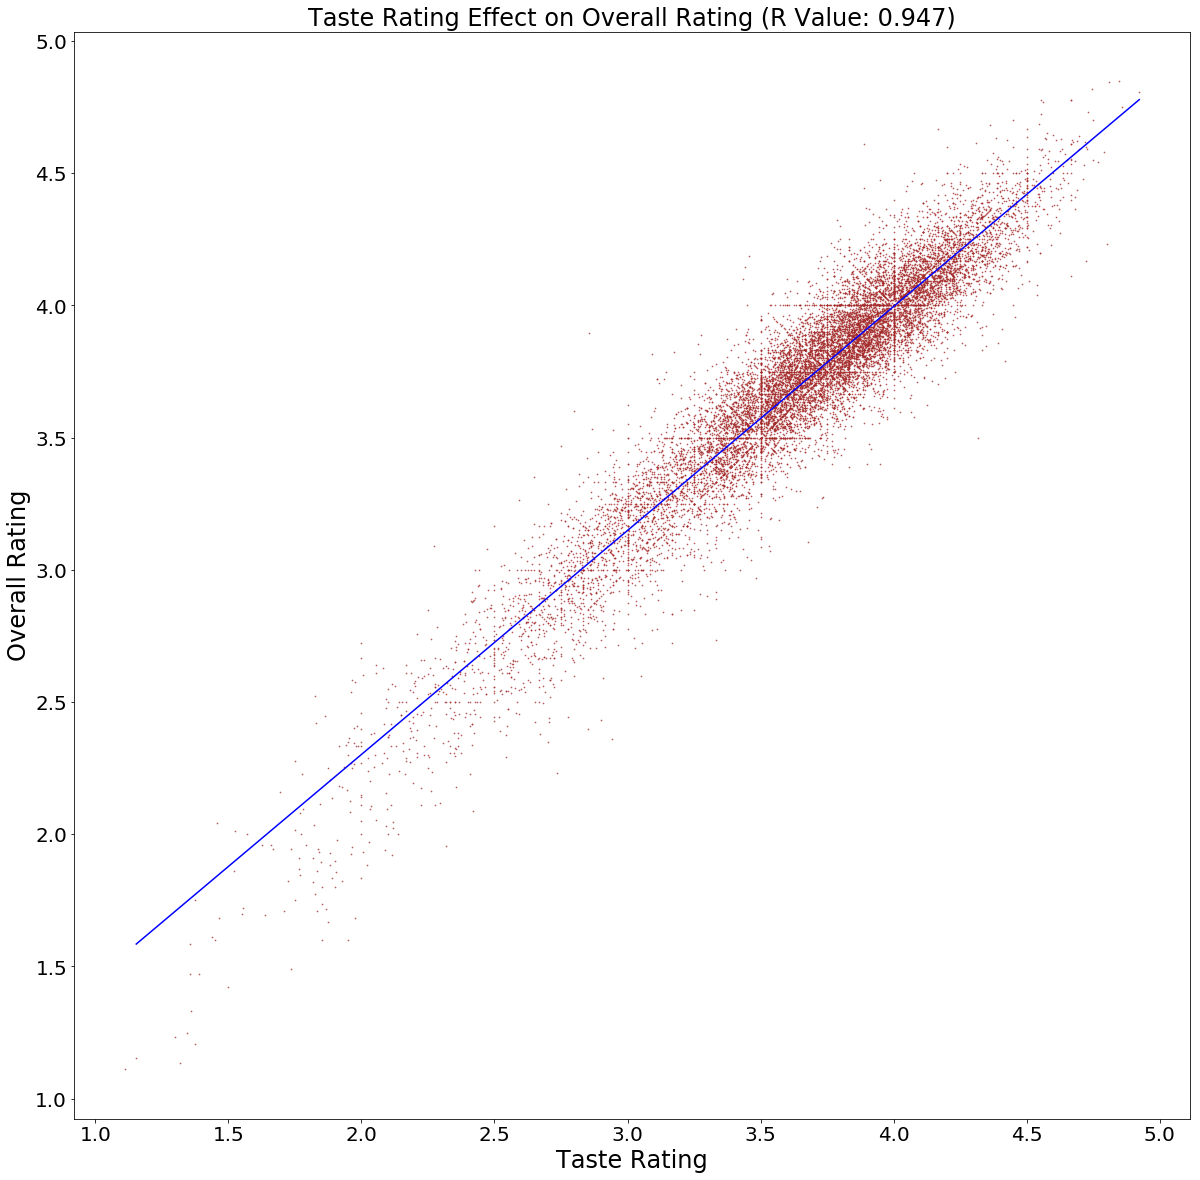

In [10]:
#Scatter plot tast vs overall
plt.figure(figsize=(20,20))
r = numpy.round(tr[2], 3)
plt.title(f'Taste Rating Effect on Overall Rating (R Value: {r})', fontsize=24)
plt.xlabel('Taste Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(beer_reviews.review_taste, beer_reviews.review_overall, s=.5, alpha=.7, color='brown')
plt.plot([taste_min, taste_max],[t1,t2],'b-')
plt.savefig('plots/taste_v_overall.png', bbox_inches="tight")
plt.show()

In [11]:
#abv
abv = br[['beer_abv','review_overall']]
abv = pd.DataFrame(abv)
abv = abv.dropna()
xabv = abv['beer_abv']

x1 = xabv.min()
x2 = xabv.max()
yy = abv['review_overall']
xabv = xabv.tolist()
#print(xabv)
yy = yy.tolist()
abvRegress = linregress(xabv,yy)
abvr = abvRegress
print(abvr)
abv1 = abvr[0]*x1 + abvr[1]
print(abv1)
abv2 = abvr[0]*x2 + abvr[1]
print(abv2)

LinregressResult(slope=0.04567397884912633, intercept=3.417447566545872, rvalue=0.24118734426312985, pvalue=2.565202764196803e-179, stderr=0.0015756761863635843)
3.4197312654883283
5.290080699360051


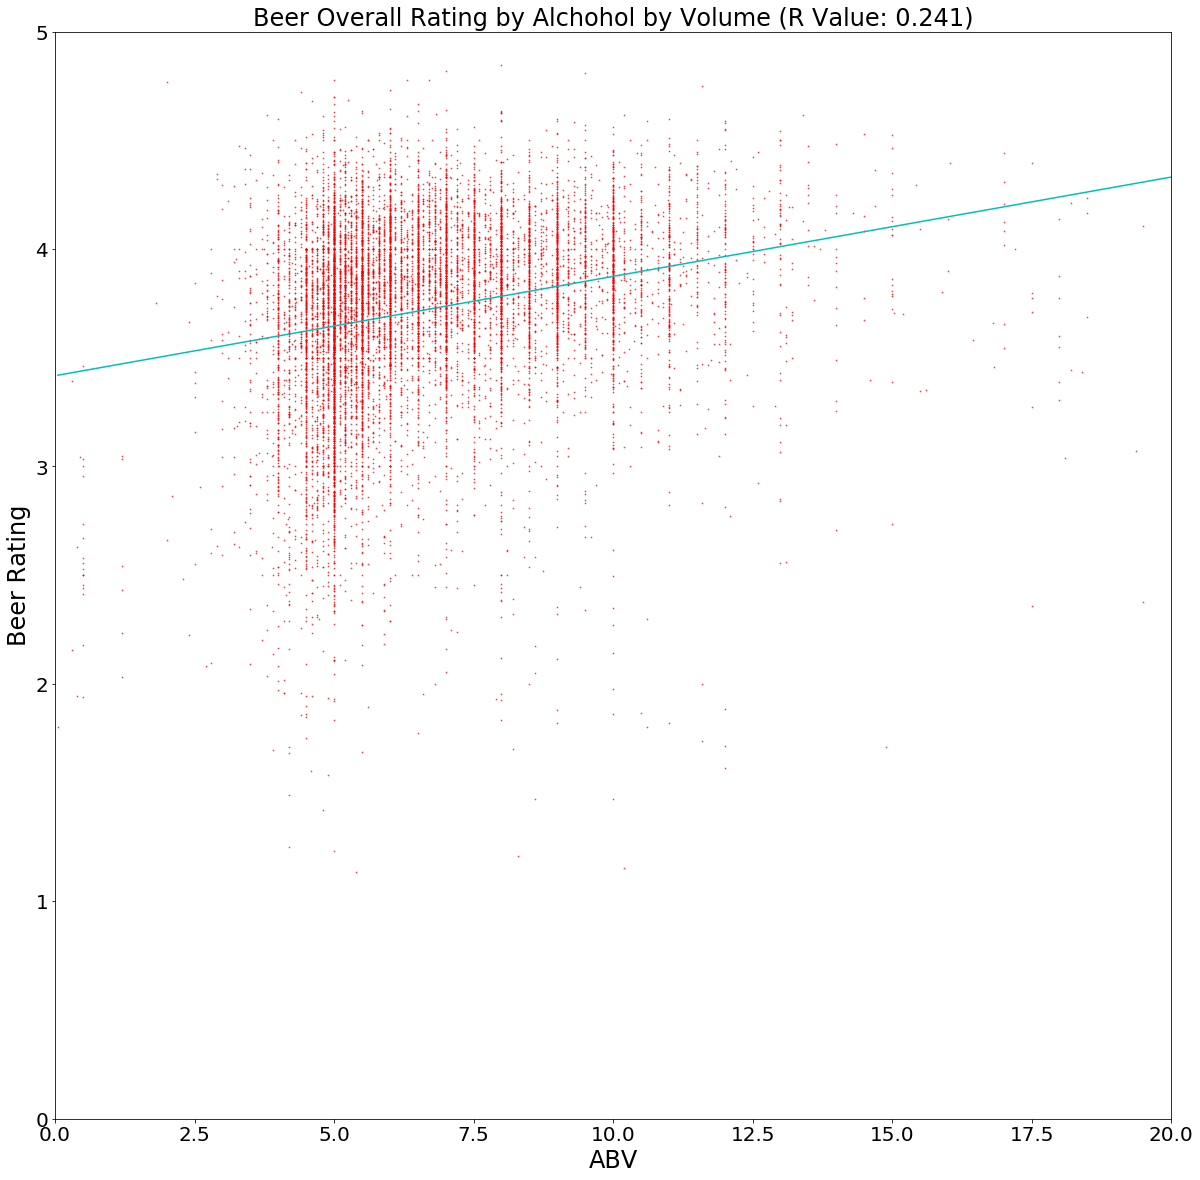

In [12]:
#Scatter plot abv vs overall rating
plt.figure(figsize=(20,20))
r = numpy.round(abvr[2], 3)
plt.scatter(beer_reviews.beer_abv, beer_reviews.review_overall, s=.5, alpha=.7, color='red' )
plt.title(f'Beer Overall Rating by Alchohol by Volume (R Value: {r})', fontsize=24)
plt.xlabel('ABV', fontsize=24)
plt.ylabel('Beer Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot([x1,x2] ,[abv1,abv2], 'c-')
plt.xlim(0,20)
plt.ylim(0,5)
plt.savefig('plots/abv_v_overall.png', bbox_inches="tight")
plt.show()

# What is the Best Beer Style/Type?

In [13]:
#import file
beer_style = pd.read_csv('clean_data/beer_style_data_cleaned.csv', encoding = "ISO-8859-1")

In [14]:
# Show only the top 10 beer styles
beer_type_df = pd.DataFrame({'beer_style': beer_style['beer_style'], 'beer_count': beer_style['beer_count']})
beer_type_df=beer_type_df.sort_values(["beer_count"],ascending=False)
beer_type_df=beer_type_df.drop(beer_type_df.index[10:])
beer_type_df=beer_type_df.sort_values(["beer_count"],ascending=True)
beer_type_df.head(11)

,beer_style,beer_count
9,American Stout,1418
8,Euro Pale Lager,1479
7,English Bitter,1486
6,American Double / Imperial IPA,1546
5,Hefeweizen,1713
4,Fruit / Vegetable Beer,1833
3,American Porter,2181
2,American Amber / Red Ale,2489
1,American Pale Ale (APA),3320
0,American IPA,3588


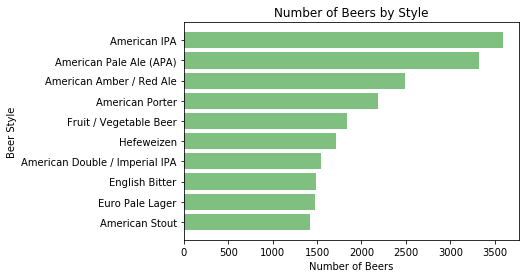

In [15]:
# Ploting the Top 10 beer styles
plt.barh(beer_type_df.beer_style, beer_type_df.beer_count ,align='center', alpha=0.5, color="g")
plt.ylabel("Beer Style")
plt.xlabel("Number of Beers")
plt.title("Number of Beers by Style")
plt.savefig("plots/Number of Beers by Style.png",bbox_inches="tight")

In [16]:
#Show on the top 10 most reviewed styles
beer_review_style = pd.DataFrame({'beer_style': beer_style['beer_style'], 'review_count': beer_style['review_count']})
beer_review_style = beer_review_style.sort_values(["review_count"],ascending=False)
beer_review_style = beer_review_style.drop(beer_review_style.index[10:])
beer_review_style = beer_review_style.sort_values(["review_count"],ascending=True)
beer_review_style.head(11)

,beer_style,review_count
30,American Strong Ale,31945
4,Fruit / Vegetable Beer,33861
28,Belgian Strong Dark Ale,37743
2,American Amber / Red Ale,45751
3,American Porter,50477
21,American Double / Imperial Stout,50705
23,Russian Imperial Stout,54129
1,American Pale Ale (APA),63469
6,American Double / Imperial IPA,85977
0,American IPA,117586


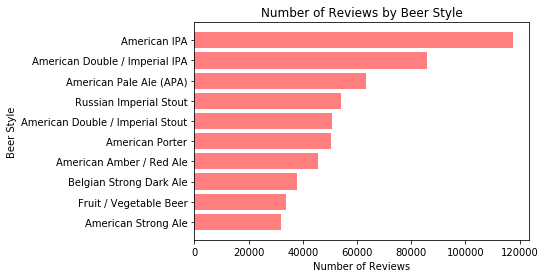

In [17]:
#Plot the top 10 most reviewed styles
plt.barh(beer_review_style['beer_style'], beer_review_style['review_count'],align='center', alpha=0.5, color="r")
plt.ylabel("Beer Style")
plt.xlabel("Number of Reviews")
plt.title("Number of Reviews by Beer Style")
plt.savefig("plots/Number of Reviews by Beer Style.png",bbox_inches="tight")

In [18]:
#show top 10 rated beer styles
df_style_means = pd.DataFrame({'beer_style': beer_style['beer_style'], 'review_avg': beer_style['review_avg']})
df_style_means=df_style_means.sort_values(["review_avg"],ascending=False)
df_style_means=df_style_means.drop(df_style_means.index[10:])
df_style_means=df_style_means.sort_values(["review_avg"],ascending=True)
df_style_means.head(11)

,beer_style,review_avg
50,Rye Beer,3.981737
82,Flanders Red Ale,3.992722
6,American Double / Imperial IPA,3.998017
67,Weizenbock,4.007969
23,Russian Imperial Stout,4.023084
21,American Double / Imperial Stout,4.029820
93,Lambic - Unblended,4.048923
76,Quadrupel (Quad),4.071630
90,Gueuze,4.086287
31,American Wild Ale,4.093262


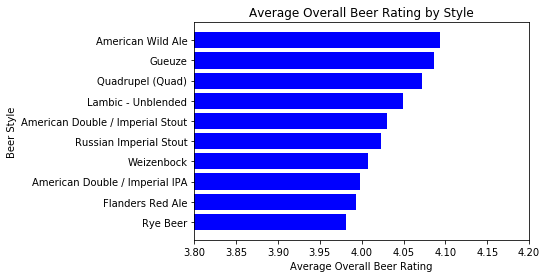

In [19]:
#Plot the top rated beer styles
plt.barh(df_style_means.beer_style, df_style_means['review_avg'],align='center', color="b",)
plt.ylabel("Beer Style")
plt.xlim(3.8,4.2)
plt.xlabel("Average Overall Beer Rating")
plt.title("Average Overall Beer Rating by Style")
plt.savefig("plots/Average Overal Beer Rating by Style.png",bbox_inches="tight")

# Where's the Best Place to Open a Brewery

In [20]:
#import file
us_df = pd.read_csv('clean_data/us_brewery_clean_data.csv', encoding = "ISO-8859-1")

In [21]:
#Bin the data
bins = [0, 1, 1.5, 2, 2.5, 3, 3.26, 3.5, 3.67, 3.83, 4, 4.5]
rating_slices = ['0.99 or less', '1 to 1.49', '1.5 to 1.99', '2 to 2.49', '2.5 to 2.99', '3 to 3.25', '3.26 to 3.49', '3.5 to 3.66', '3.67 to 3.82', '3.83 to 3.99', '4 to 4.5']
us_df['Rating Slices'] = pd.cut(us_df['review_overall'], bins, labels=rating_slices)
us_df['Rating Diff'] = us_df['google_rating'] - us_df['review_overall']
us_df.head()


,Unnamed: 0,Brewery,brewery_id,review_overall,latitude,longitude,google_rating,Rating Slices,Rating Diff
0,1,16 Mile Brewing Company,20688,3.57,38.678818,-75.378136,4.6,3.5 to 3.66,1.03
1,3,192 Brewing Company,22972,1.83,47.756803,-122.242008,4.1,1.5 to 1.99,2.27
2,6,21st Amendment Brewery,735,3.70,37.782470,-122.392512,4.3,3.67 to 3.82,0.60
3,7,23rd Street Brewery,9167,3.90,38.943023,-95.281066,4.3,3.83 to 3.99,0.40
4,8,2nd Shift Brewery,24428,3.77,38.621493,-90.280761,4.8,3.67 to 3.82,1.03


In [22]:
us_df['Rating Slices'].value_counts()

3.67 to 3.82    234
3.83 to 3.99    231
3.5 to 3.66     176
4 to 4.5        148
3.26 to 3.49    144
2.5 to 2.99      69
3 to 3.25        63
2 to 2.49        20
1.5 to 1.99       8
1 to 1.49         2
0.99 or less      2
Name: Rating Slices, dtype: int64

In [23]:
aaa_breweries = us_df.loc[us_df['Rating Slices'] == '4 to 4.5', :]
aa_breweries = us_df.loc[us_df['Rating Slices'] == '3.83 to 3.99', :]
a_breweries = us_df.loc[us_df['Rating Slices'] == '3.67 to 3.82', :]
bbb_breweries = us_df.loc[us_df['Rating Slices'] == '3.5 to 3.66', :]
bb_breweries = us_df.loc[us_df['Rating Slices'] == '3.26 to 3.49', :]
b_breweries = us_df.loc[us_df['Rating Slices'] == '3 to 3.25', :]
cc_breweries = us_df.loc[us_df['Rating Slices'] == '2.5 to 2.99', :]
c_breweries = us_df.loc[us_df['Rating Slices'] == '2 to 2.49', :]
dd_breweries = us_df.loc[us_df['Rating Slices'] == '1.5 to 1.99', :]
d_breweries = us_df.loc[us_df['Rating Slices'] == '1 to 1.49', :]
f_breweries = us_df.loc[us_df['Rating Slices'] == '0.99 or less', :]

In [24]:
aaa_locations = aaa_breweries[['latitude', 'longitude']]
aa_locations = aa_breweries[['latitude', 'longitude']]
a_locations = a_breweries[['latitude', 'longitude']]
bbb_locations = bbb_breweries[['latitude', 'longitude']]
bb_locations = bb_breweries[['latitude', 'longitude']]
b_locations = b_breweries[['latitude', 'longitude']]
cc_locations = cc_breweries[['latitude', 'longitude']]
c_locations = c_breweries[['latitude', 'longitude']]
dd_locations = dd_breweries[['latitude', 'longitude']]
d_locations = d_breweries[['latitude', 'longitude']]
f_locations = f_breweries[['latitude', 'longitude']]

In [25]:
locations = aaa_locations

# Fill NaN values and convert to float
rating = aaa_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
locations = aa_locations

# Fill NaN values and convert to float
rating = aa_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
locations = a_locations

# Fill NaN values and convert to float
rating = a_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
locations = bbb_locations

# Fill NaN values and convert to float
rating = bbb_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
locations = bb_locations

# Fill NaN values and convert to float
rating = bb_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
locations = b_locations

# Fill NaN values and convert to float
rating = b_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
locations = cc_locations

# Fill NaN values and convert to float
rating = cc_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [32]:
locations = c_locations

# Fill NaN values and convert to float
rating = c_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
locations = dd_locations

# Fill NaN values and convert to float
rating = dd_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
locations = d_locations

# Fill NaN values and convert to float
rating = d_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
locations = f_locations

# Fill NaN values and convert to float
rating = f_breweries['review_overall'].astype(float)

fig = gmaps.figure(center=(39.50, -98.35), zoom_level=3.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=16,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))